
 1. DESCRIPTIVE STATISTICS

Central Tendency: Mean, Median, Mode
Mean (Group 1): 48.96153482605907
Median (Group 1): 48.73043708220287
Note: Mode is not meaningful for continuous data.

Variability: How spread out the data is
Standard Deviation (Group 1): 9.036161766446297
Variance (Group 1): 81.65221946938584

Frequency Distribution: Histogram


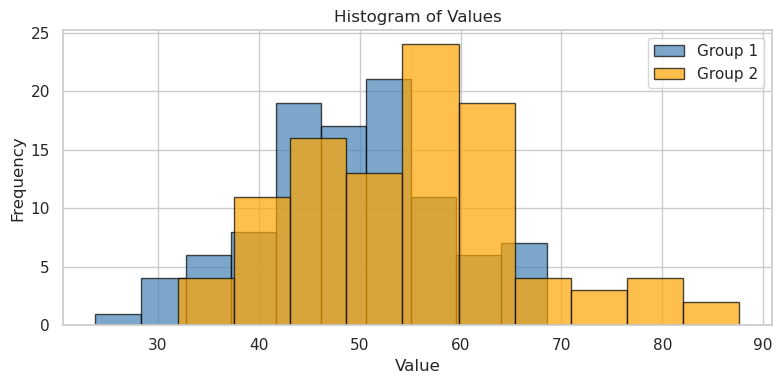


 2. INFERENTIAL STATISTICS

T-Test: Compare means of two groups
T-statistic = -4.316, P-value = 0.00003
Result: Statistically significant difference.

ANOVA: Test means across 3+ groups
             df        sum_sq      mean_sq         F    PR(>F)
group       2.0   2048.009848  1024.004924  9.620267  0.000089
Residual  297.0  31613.413113   106.442468       NaN       NaN

Regression Analysis: Predicting a variable from another
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1706.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           8.54e-64
Time:                        18:27:50   Log-Likelihood:                -212.72
No. Observations:                 100   AIC:                             429.4
Df Residuals: 

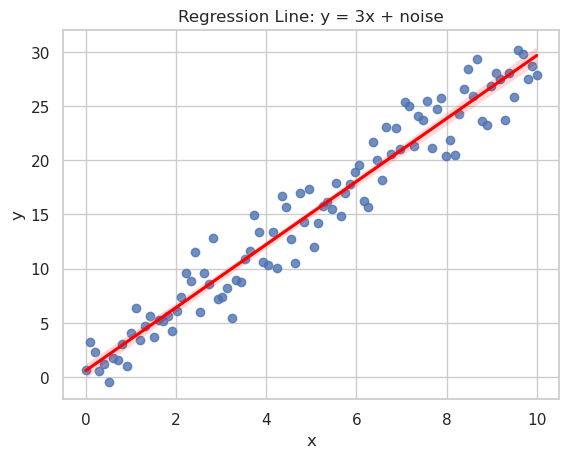


Time Series Analysis: Decompose trends and patterns over time


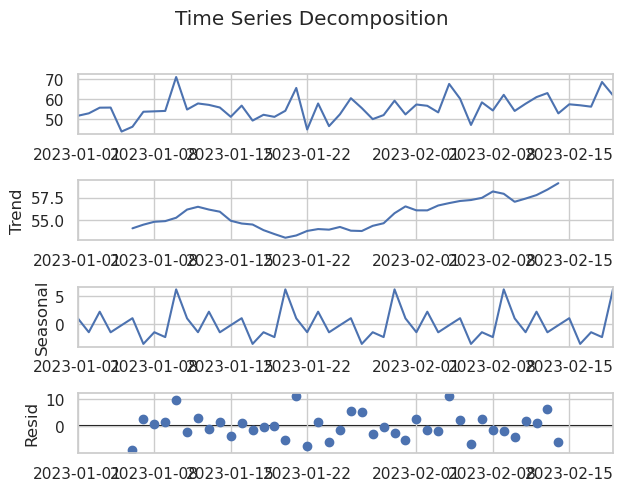


Shapiro-Wilk Test: Check if data is normally distributed
Statistic = 0.9899, P-value = 0.6552
Result: Data is normal

 Mann-Kendall Test: Detect trend in time series (via Kendall Tau)
Kendall Tau = 0.2767, P-value = 0.0046
Result: Significant trend

Kolmogorov-Smirnov Test: Compare data with normal distribution
KS Statistic = 0.0508, P-value = 0.9467
Result: Data follows normal distribution

Pearson Correlation between NO2 and PM2.5
Correlation = 0.087, P-value = 0.2181


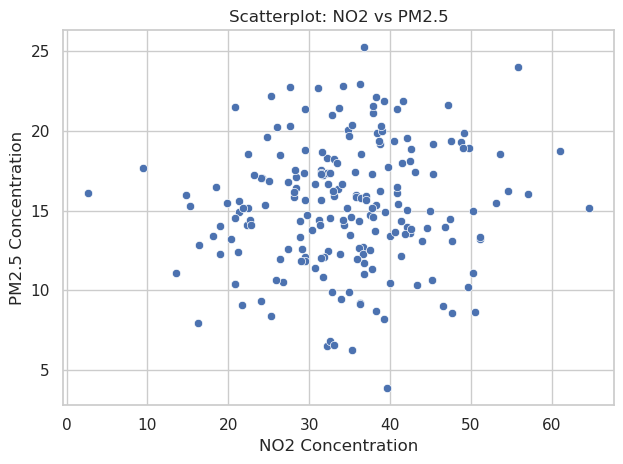


Chi-Square Test between Region and High NO2 (> 40)
Chi-square statistic: 0.6529891861995476
P-value: 0.41904599053401026
Contingency Table:
 High_NO2  False  True 
Region                
Rural        76     22
Urban        73     29

PCA: Dimensionality reduction for NO2, Temperature, PM2.5
Explained Variance by each component: [0.37313045 0.32314806]


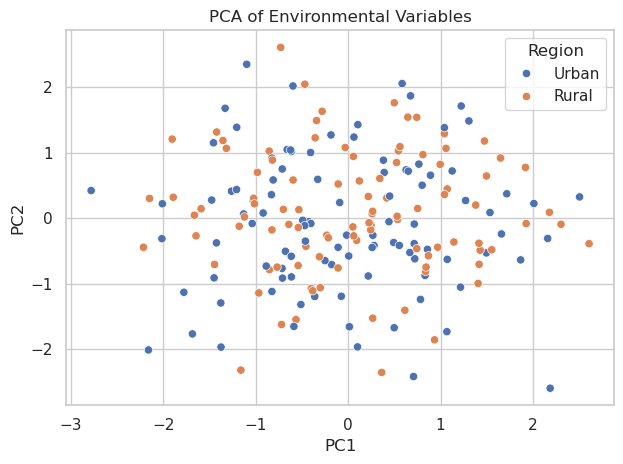


Confidence Interval for Mean NO2 (95%)
Mean NO2 = 34.48, 95% CI = (33.13, 35.83)

Effect Size (Cohen's d): NO2 vs PM2.5
Cohen's d = 2.598 (small ~0.2, medium ~0.5, large ~0.8)

Boxplot: Compare group distributions and detect outliers


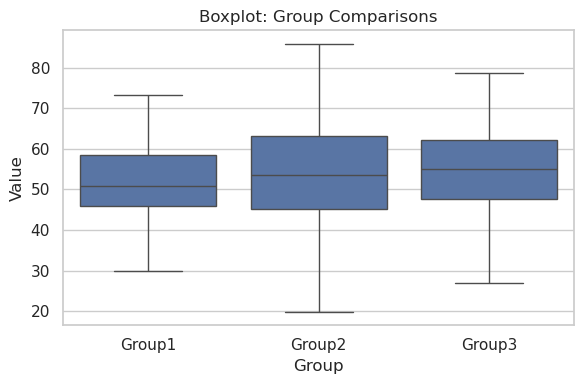


Residual Plot: Check linearity and variance in regression


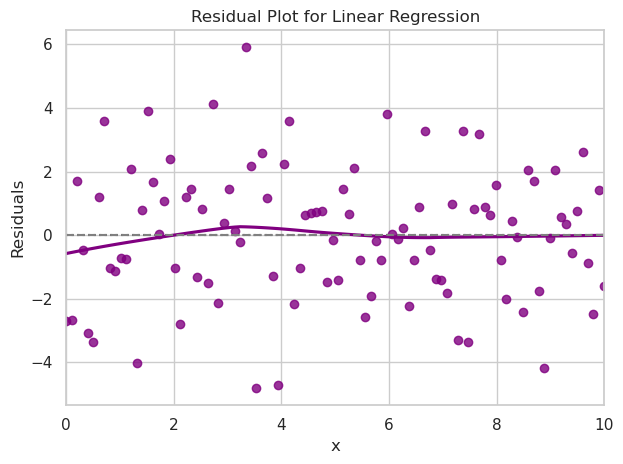


Wilcoxon Test: Non-parametric comparison of two related groups
Wilcoxon Statistic = 179.0, P-value = 0.2801
Result: No significant change

Monte Carlo Simulation: Estimate probability by random sampling


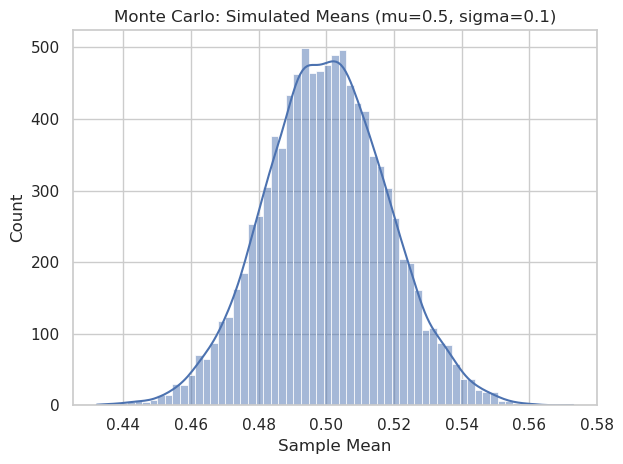

Estimated 95% CI from Monte Carlo: 0.4644 to 0.5362

Sen’s Slope Estimator: Estimate slope of trend line (non-parametric)
Sen’s Slope = 0.2012, Intercept = 50.02


In [8]:
# ============================
# Covers Descriptive & Inferential Statistics from scratch
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, kstest, norm, kendalltau
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# Simulated Dataset Setup
# -------------------------------
group1 = np.random.normal(loc=50, scale=10, size=100)  # Group 1
group2 = np.random.normal(loc=55, scale=12, size=100)  # Group 2
time_series_data = np.random.normal(loc=50, scale=5, size=50) + np.linspace(0, 10, 50)
time_series = pd.Series(time_series_data, index=pd.date_range("2023-01-01", periods=50))

# ===============================
# 1. DESCRIPTIVE STATISTICS
# ===============================

print("\n========================")
print(" 1. DESCRIPTIVE STATISTICS")
print("========================")

# -- Central Tendency
print("\nCentral Tendency: Mean, Median, Mode")
print("Mean (Group 1):", np.mean(group1))
print("Median (Group 1):", np.median(group1))
print("Note: Mode is not meaningful for continuous data.")

# -- Variability
print("\nVariability: How spread out the data is")
print("Standard Deviation (Group 1):", np.std(group1))
print("Variance (Group 1):", np.var(group1))

# -- Frequency Distribution
print("\nFrequency Distribution: Histogram")
plt.figure(figsize=(8, 4))
plt.hist(group1, bins=10, alpha=0.7, label='Group 1', color='steelblue', edgecolor='black')
plt.hist(group2, bins=10, alpha=0.7, label='Group 2', color='orange', edgecolor='black')
plt.title("Histogram of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# 2. INFERENTIAL STATISTICS
# ===============================
print("\n========================")
print(" 2. INFERENTIAL STATISTICS")
print("========================")

# -- T-test
print("\nT-Test: Compare means of two groups")
t_stat, t_p = ttest_ind(group1, group2)
print(f"T-statistic = {t_stat:.3f}, P-value = {t_p:.5f}")
if t_p < 0.05:
    print("Result: Statistically significant difference.")
else:
    print("Result: No significant difference.")

# -- ANOVA
print("\nANOVA: Test means across 3+ groups")
group3 = np.random.normal(loc=53, scale=11, size=100)
df_anova = pd.DataFrame({
    "value": np.concatenate([group1, group2, group3]),
    "group": ["Group1"]*100 + ["Group2"]*100 + ["Group3"]*100
})
model = ols("value ~ group", data=df_anova).fit()
anova_results = anova_lm(model)
print(anova_results)

# -- Regression Analysis
print("\nRegression Analysis: Predicting a variable from another")
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(0, 2, 100)
df_reg = pd.DataFrame({"x": x, "y": y})
reg_model = ols("y ~ x", data=df_reg).fit()
print(reg_model.summary())

plt.figure()
sns.regplot(x='x', y='y', data=df_reg, line_kws={"color": "red"})
plt.title("Regression Line: y = 3x + noise")
plt.show()

# -- Time Series Analysis
print("\nTime Series Analysis: Decompose trends and patterns over time")
result = seasonal_decompose(time_series, model='additive', period=10)
result.plot()
plt.suptitle("Time Series Decomposition", y=1.02)
plt.tight_layout()
plt.show()

# -- Shapiro-Wilk Test
print("\nShapiro-Wilk Test: Check if data is normally distributed")
stat, p = shapiro(group1)
print(f"Statistic = {stat:.4f}, P-value = {p:.4f}")
print("Result:", "Data is normal" if p > 0.05 else "Data is NOT normal")

# -- Mann-Kendall Test (simulated using Kendall Tau)
print("\nMann-Kendall Test: Detect trend in time series (via Kendall Tau)")
tau, p_tau = kendalltau(np.arange(len(time_series)), time_series)
print(f"Kendall Tau = {tau:.4f}, P-value = {p_tau:.4f}")
print("Result:", "Significant trend" if p_tau < 0.05 else "No significant trend")

# -- Kolmogorov-Smirnov Test
print("\nKolmogorov-Smirnov Test: Compare data with normal distribution")
ks_stat, ks_p = kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
print(f"KS Statistic = {ks_stat:.4f}, P-value = {ks_p:.4f}")
print("Result:", "Data follows normal distribution" if ks_p > 0.05 else "Data does NOT follow normal distribution")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
np.random.seed(123)

# ----------------------------------
# Simulated Environmental Dataset
# ----------------------------------
# Simulate NO2, Temperature, PM2.5 across Urban/Rural regions
df_env = pd.DataFrame({
    "Region": np.random.choice(["Urban", "Rural"], size=200),
    "NO2": np.random.normal(35, 10, 200),
    "Temperature": np.random.normal(25, 5, 200),
    "PM25": np.random.normal(15, 4, 200)
})

# ===============================
# 1. Pearson Correlation
# ===============================
print("\nPearson Correlation between NO2 and PM2.5")
corr, p_val = pearsonr(df_env["NO2"], df_env["PM25"])
print(f"Correlation = {corr:.3f}, P-value = {p_val:.4f}")
plt.figure()
sns.scatterplot(x="NO2", y="PM25", data=df_env)
plt.title("Scatterplot: NO2 vs PM2.5")
plt.xlabel("NO2 Concentration")
plt.ylabel("PM2.5 Concentration")
plt.tight_layout()
plt.show()

# ===============================
# 2. Chi-Square Test (Categorical Independence)
# ===============================
print("\nChi-Square Test between Region and High NO2 (> 40)")
df_env["High_NO2"] = df_env["NO2"] > 40
contingency_table = pd.crosstab(df_env["Region"], df_env["High_NO2"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Contingency Table:\n", contingency_table)

# ===============================
# 3. PCA - Principal Component Analysis
# ===============================
print("\nPCA: Dimensionality reduction for NO2, Temperature, PM2.5")
features = ["NO2", "Temperature", "PM25"]
x = df_env[features]
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)
explained_var = pca.explained_variance_ratio_

print("Explained Variance by each component:", explained_var)

df_pca = pd.DataFrame(data=components, columns=["PC1", "PC2"])
plt.figure()
sns.scatterplot(x="PC1", y="PC2", hue=df_env["Region"], data=df_pca)
plt.title("PCA of Environmental Variables")
plt.tight_layout()
plt.show()

# ===============================
# 4. Confidence Intervals for NO2
# ===============================
print("\nConfidence Interval for Mean NO2 (95%)")
mean_no2 = np.mean(df_env["NO2"])
std_err = np.std(df_env["NO2"], ddof=1) / np.sqrt(len(df_env))
ci_low = mean_no2 - 1.96 * std_err
ci_high = mean_no2 + 1.96 * std_err
print(f"Mean NO2 = {mean_no2:.2f}, 95% CI = ({ci_low:.2f}, {ci_high:.2f})")

# ===============================
# 5. Effect Size (Cohen’s d)
# ===============================
print("\nEffect Size (Cohen's d): NO2 vs PM2.5")
mean_diff = np.mean(df_env["NO2"]) - np.mean(df_env["PM25"])
pooled_sd = np.sqrt((np.std(df_env["NO2"])**2 + np.std(df_env["PM25"])**2) / 2)
cohen_d = mean_diff / pooled_sd
print(f"Cohen's d = {cohen_d:.3f} (small ~0.2, medium ~0.5, large ~0.8)")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

sns.set(style="whitegrid")
np.random.seed(456)

# -- Recreate simulated data used earlier for consistency
group1 = np.random.normal(loc=50, scale=10, size=100)
group2 = np.random.normal(loc=55, scale=12, size=100)
group3 = np.random.normal(loc=53, scale=11, size=100)

x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(0, 2, 100)
df_reg = pd.DataFrame({"x": x, "y": y})
reg_model = ols("y ~ x", data=df_reg).fit()
residuals = reg_model.resid

time_series_data = np.random.normal(loc=50, scale=5, size=50) + np.linspace(0, 10, 50)
time_series = pd.Series(time_series_data, index=pd.date_range("2023-01-01", periods=50))

# ===============================
# 19. Boxplot Visualization
# ===============================
print("\nBoxplot: Compare group distributions and detect outliers")
combined_df = pd.DataFrame({
    "Value": np.concatenate([group1, group2, group3]),
    "Group": ["Group1"]*100 + ["Group2"]*100 + ["Group3"]*100
})
plt.figure(figsize=(6, 4))
sns.boxplot(x="Group", y="Value", data=combined_df)
plt.title("Boxplot: Group Comparisons")
plt.tight_layout()
plt.show()

# ===============================
# 20. Residual Plot (Regression Diagnostics)
# ===============================
print("\nResidual Plot: Check linearity and variance in regression")
plt.figure()
sns.residplot(x=df_reg["x"], y=residuals, lowess=True, color="purple")
plt.axhline(0, linestyle='--', color='gray')
plt.title("Residual Plot for Linear Regression")
plt.xlabel("x")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# ===============================
# 21. Wilcoxon Signed-Rank Test
# ===============================
print("\nWilcoxon Test: Non-parametric comparison of two related groups")
paired1 = np.random.normal(60, 5, 30)
paired2 = paired1 + np.random.normal(0, 2, 30)
stat, p = wilcoxon(paired1, paired2)
print(f"Wilcoxon Statistic = {stat}, P-value = {p:.4f}")
print("Result:", "Significant change" if p < 0.05 else "No significant change")

# ===============================
# 22. Monte Carlo Simulation
# ===============================
print("\nMonte Carlo Simulation: Estimate probability by random sampling")
sim_results = [np.mean(np.random.normal(loc=0.5, scale=0.1, size=30)) for _ in range(10000)]

plt.figure()
sns.histplot(sim_results, kde=True)
plt.title("Monte Carlo: Simulated Means (mu=0.5, sigma=0.1)")
plt.xlabel("Sample Mean")
plt.tight_layout()
plt.show()

ci_sim = np.percentile(sim_results, [2.5, 97.5])
print(f"Estimated 95% CI from Monte Carlo: {ci_sim[0]:.4f} to {ci_sim[1]:.4f}")

!pip install pymannkendall
# ===============================
# 23. Sen’s Slope Estimator (Optional)
# ===============================
print("\nSen’s Slope Estimator: Estimate slope of trend line (non-parametric)")
try:
    from pymannkendall import sens_slope
    sen_result = sens_slope(time_series.values)
    print(f"Sen’s Slope = {sen_result.slope:.4f}, Intercept = {sen_result.intercept:.2f}")
except ImportError:
    print("Sen’s Slope skipped.")

